# Exploratory Data Analysis (EDA)

## 1. Initial setup and data loading

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/data-preprocessed-EDA.csv')

/var/folders/xy/m0gg_ygd339crs0vw79bl00h0000gn/T/ipykernel_2559/510955230.py:5: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/data-preprocessed-EDA.csv')


## 2. Age and year distributions

Visualize the distributions of participants' ages at first and last participation, as well as the distribution of their first and last participation years. This helps us understand the age demographics and the temporal aspects of participation.

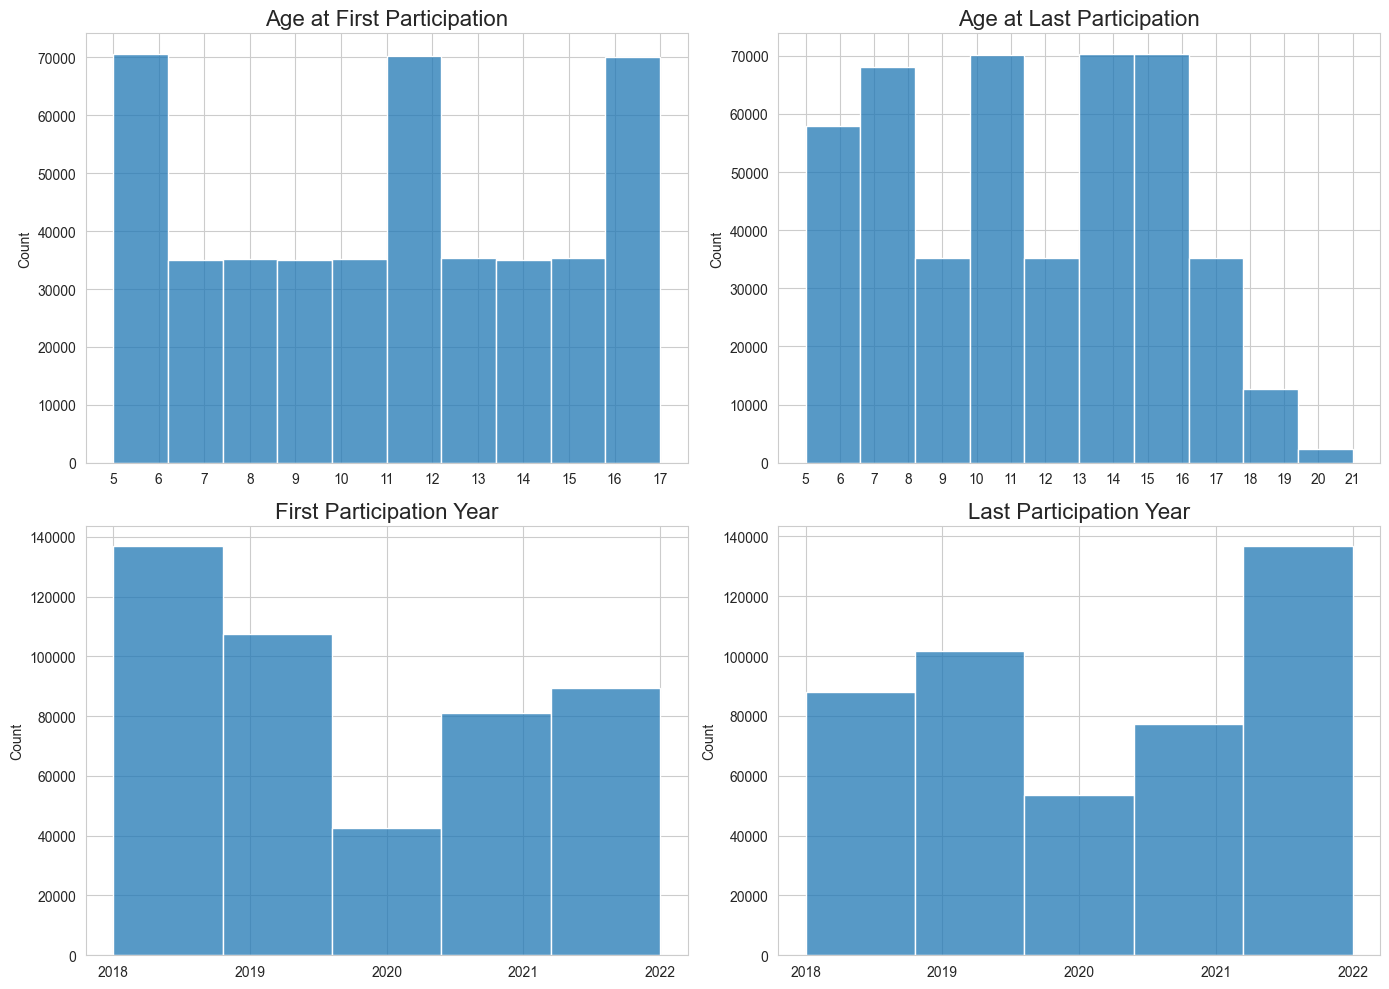

In [23]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['age_at_first_participation'], bins=10, kde=False, ax=axes[0, 0])
axes[0, 0].set_title('Age at First Participation', fontsize=16)
axes[0, 0].set_xticks(df['age_at_first_participation'].unique())
axes[0, 0].set_xlabel('')

sns.histplot(df['age_at_last_participation'], bins=10, kde=False, ax=axes[0, 1])
axes[0, 1].set_title('Age at Last Participation', fontsize=16)
axes[0, 1].set_xticks(df['age_at_last_participation'].unique())
axes[0, 1].set_xlabel('')

sns.histplot(df['first_participation_year'], bins=len(df['first_participation_year'].unique()), kde=False, ax=axes[1, 0])
axes[1, 0].set_title('First Participation Year', fontsize=16)
axes[1, 0].set_xticks(df['first_participation_year'].unique())
axes[1, 0].set_xlabel('')

sns.histplot(df['last_participation_year'], bins=len(df['last_participation_year'].unique()), kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Last Participation Year', fontsize=16)
axes[1, 1].set_xticks(df['last_participation_year'].unique())
axes[1, 1].set_xlabel('')

plt.tight_layout()
plt.savefig('../results/age-year-distributions.png')
plt.show()

## 3. Sessions, price, and duration distributions

Visualize the distributions of session participation rates, average session prices, and average program durations. These plots provide insights into participant engagement and program characteristics.

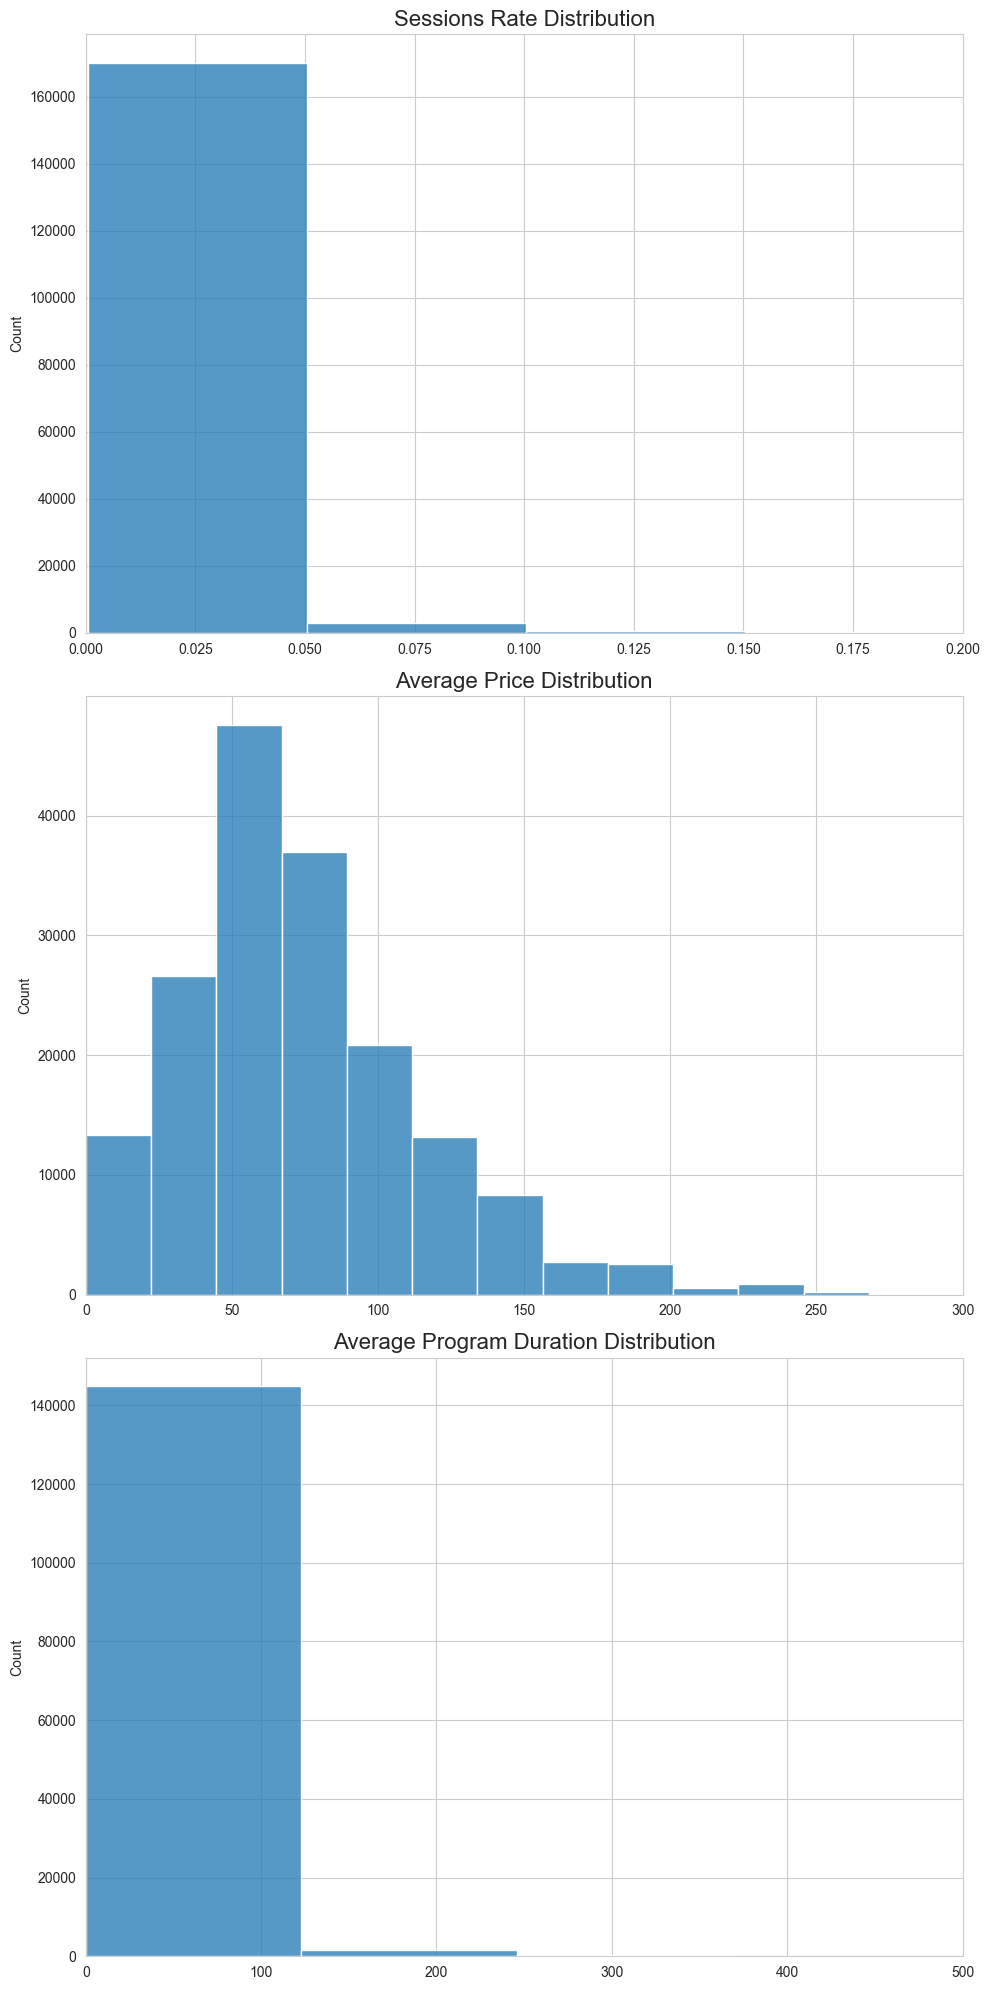

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

sns.histplot(df['sessions_rate'], bins=20, kde=False, ax=axes[0])
axes[0].set_title('Sessions Rate Distribution', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_xlim(0.0, 0.2)

sns.histplot(df['avg_price'], bins=20, kde=False, ax=axes[1])
axes[1].set_title('Average Price Distribution', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_xlim(0, 300)

sns.histplot(df['avg_duration'], bins=30, kde=False, ax=axes[2])
axes[2].set_title('Average Program Duration Distribution', fontsize=16)
axes[2].set_xlabel('')
axes[2].set_xlim(0, 500)

plt.tight_layout()
plt.savefig('../results/sessions-price-duration-distributions.png')
plt.show()

## 4. Gender and ethnicity distribution

Analyze the gender and ethnicity distribution among participants. This analysis helps in understanding the diversity within the participant population.

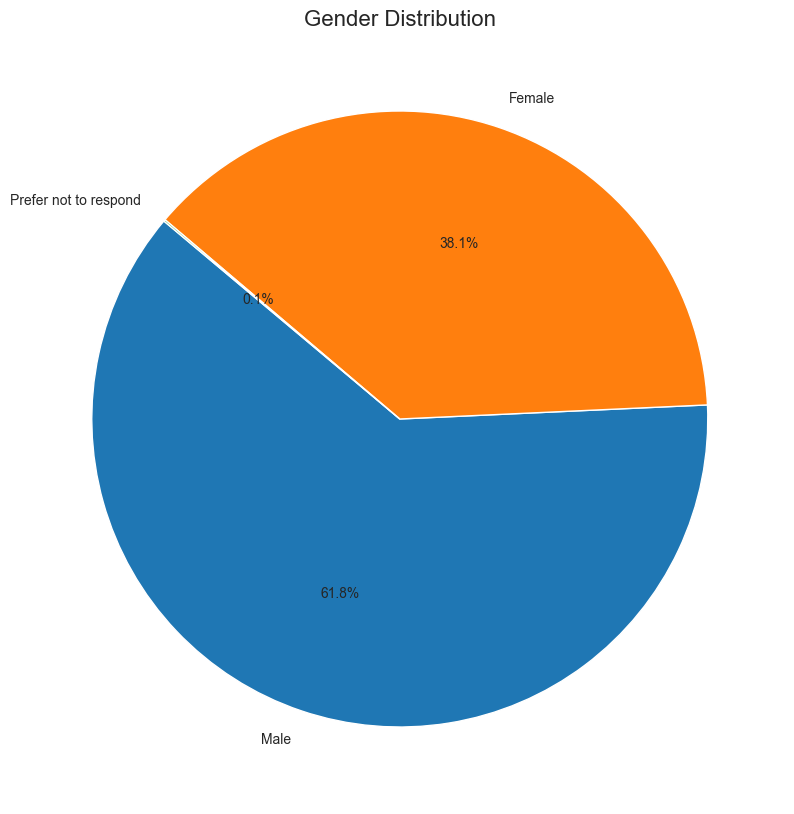

In [25]:
gender_counts = df['gender'].value_counts()
gender_counts = gender_counts[gender_counts>50]

plt.figure(figsize=(10, 10))

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution', fontsize=16)

plt.savefig('../results/gender-distribution.png')
plt.show()

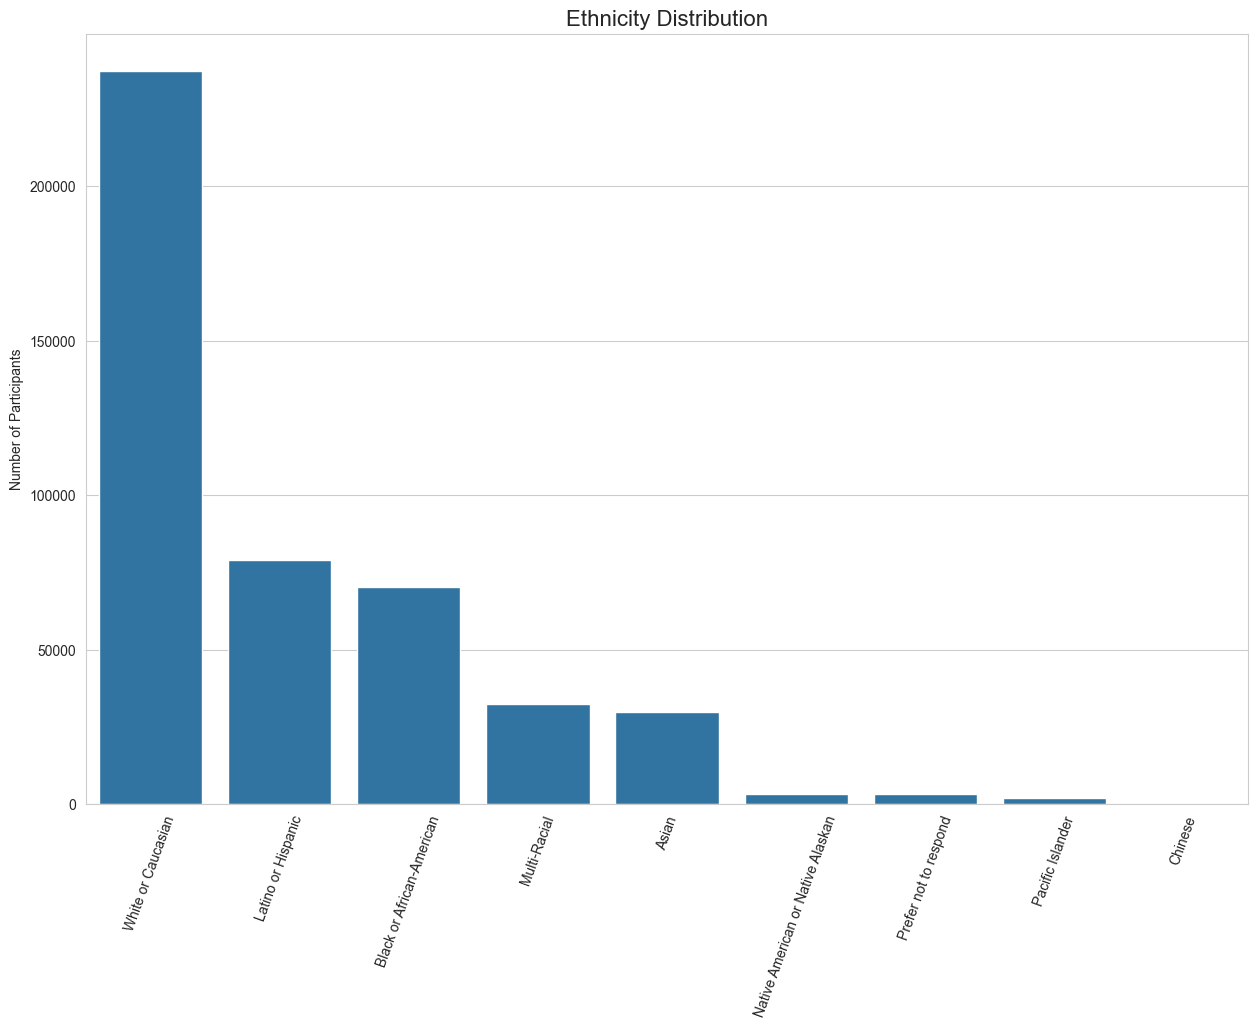

In [26]:
ethnicity_counts = df['ethnicity'].value_counts().dropna()
ethnicity_counts = ethnicity_counts[ethnicity_counts>50]

plt.figure(figsize=(15, 10))

sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values)
plt.title('Ethnicity Distribution', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Participants')
plt.xticks(rotation=70)

plt.savefig('../results/ethnicity-distribution.png')
plt.show()

## 5. Handling missing data and correlation analysis

First, identify columns with a high proportion of missing values and exclude them. Then, create a correlation matrix for the remaining features to identify potential relationships between variables.

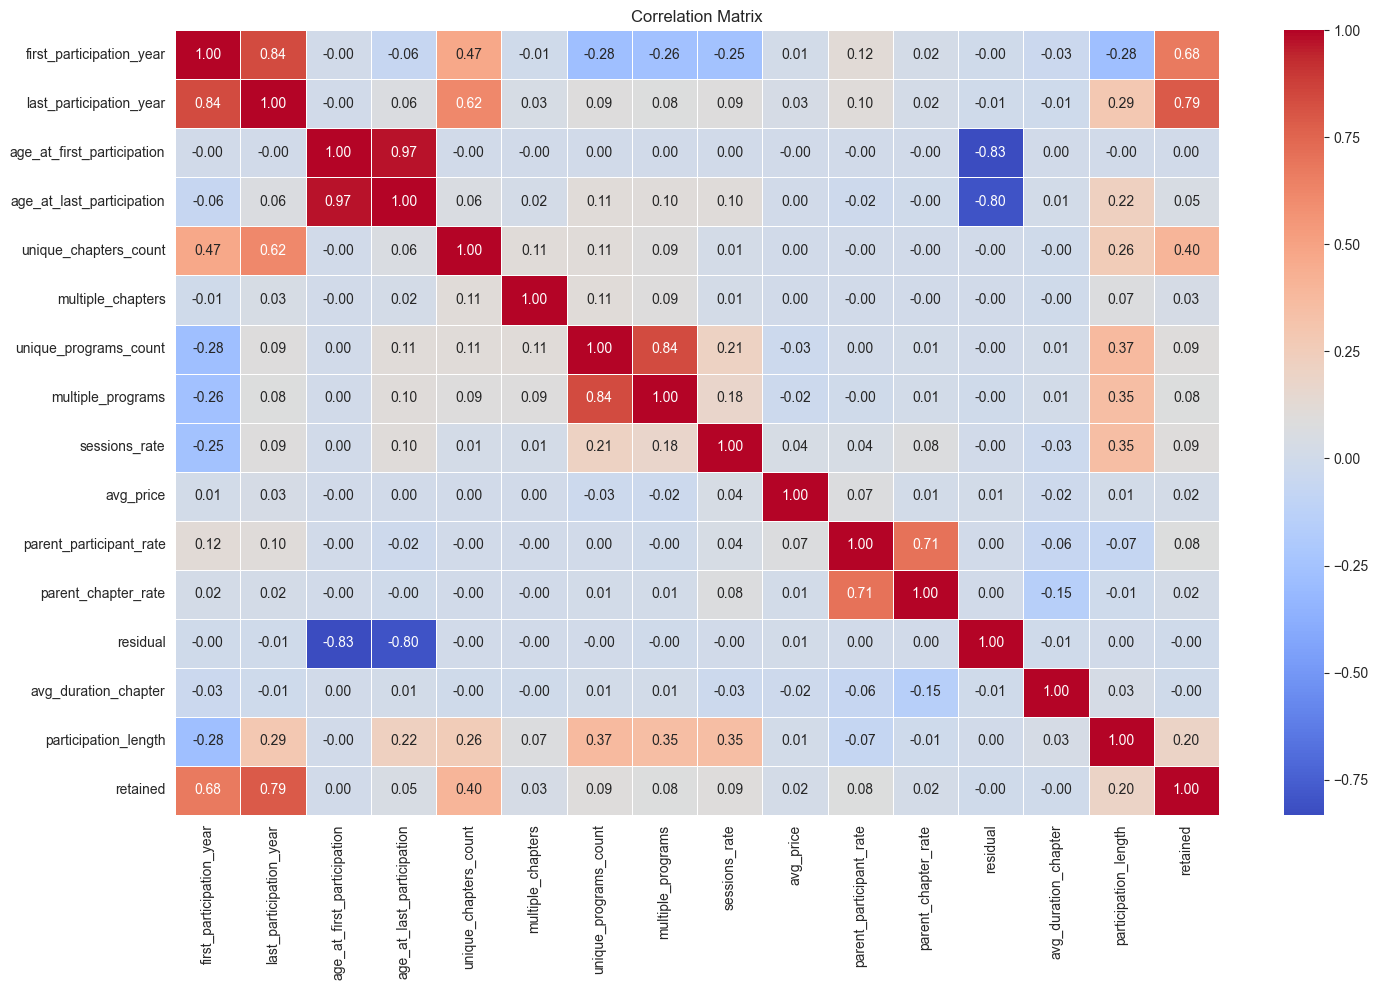

In [27]:
na_proportions = df.isnull().mean()
columns_to_keep = na_proportions[na_proportions <= 0.65].index
corr_df = df[columns_to_keep].select_dtypes(include=['int64', 'float64'])
corr_matrix = corr_df.corr()

plt.figure(figsize=[15, 10])
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.savefig('../results/correlation-matrix.png')
plt.show()